In [20]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import collections  as mc
# import networkx as nx
# import nxpd as nxpd
import community as comm
from collections import deque
from itertools import product

import numpy as np
import networkx as nx
import numpy.linalg as la
import scipy.cluster.vq as vq
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
G = nx.powerlaw_cluster_graph(100, 1, 0.0)

In [4]:
coord = nx.spring_layout(G, iterations=1000)

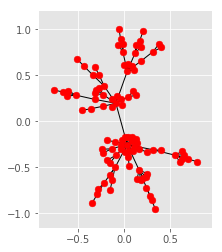

In [16]:
fig = plt.figure()
axs = fig.add_subplot(111, aspect= 1)
# axs.axis(’off’)
nx.draw_networkx_edges(G, coord)
nx.draw_networkx_nodes(G, coord, node_size=45)
plt.show()

In [17]:
A = nx.adjacency_matrix(G)

In [18]:
D = np.diag(np.ravel(np.sum(A,axis=1)))
L = D - A

In [22]:
# random m by n data matrix where m > n
# X = np.random.randn(20,10)

In [23]:
# compute sample covariance matrix
# C = np.cov(X)

In [33]:
# compute eigenvalues/eigenvectors using eig
l, U = la.eigh(np.cov(L))
# 'l' is the evals and 'U' is the evects

At this point, it actually comes in handy that NumPy’s
la.eigh function returns eigenvalues and eigenvectors in
ascending order, because spectral clustering

In [34]:
f = U[:,1]

In [35]:
labels = np.ravel(np.sign(f))

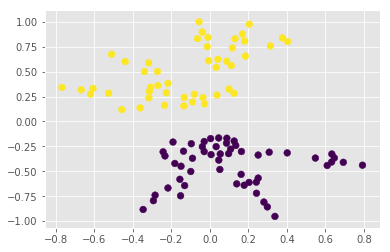

In [36]:
fig = plt.figure()
nx.draw_networkx_nodes(G, coord,
node_size=45,
node_color=labels)

In [37]:
k = 3
means, labels = vq.kmeans2(U[:,1:k], k)

In [38]:
means

array([[ 0.15020807, -0.12973432],
       [-0.08923099, -0.02002209],
       [ 0.06697461,  0.12593295]])

In [39]:
labels

array([2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0,
       1, 1, 1, 1, 2, 2, 1, 1], dtype=int32)